# 😶 데이터 가져오기

as_frame 옵션을 통해 데이터를 데이터 프레임형식으로 가져올지 말지를 결정할 수 있습니다.

데이터가 어떻게 되어있는지 보기 편하게 데이터 프레임 형식으로 본 후 np어레이 형식으로 바꾸려 합니다.

In [378]:
from sklearn.datasets import load_diabetes
import pandas as pd
from pandas import DataFrame
import numpy as np
#df 형식으로 자료를 불러올 것인지 as_frame 인자를 통해 결정할 수 있습니다. default값이 False이므로 아무것도 입력하지 않으면 자료들이
# ndarray형식으로 가져와진답니다.
diabets = load_diabetes(as_frame=1)

먼저 변수 X,y에 당뇨병 데이터의 feature 와 label을 각각 할당해 줍니다.

In [379]:
df_X = diabets.data
df_y = diabets.target

In [380]:
print(diabets.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [381]:
type(df_X),type(df_y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

데이터의 type을 확인해 본 결과.
X는 dataframe y는 Series 자료 형식이네요. Series 형식은 dict형식과 비슷하다 합니다.

In [382]:
df_X.shape,df_y.shape

((442, 10), (442,))

df_X = 442개 데이터, 10개 columns

df_y = 442개 데이터의 배열.

In [383]:
df_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [384]:
df_y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

범주형 데이터를 연속형 데이터처럼 변환해야 할 줄 알았으나 데이터를 살펴보니 

이미 데이터들의 Scale이 잘 정규화되어있어 그럴 필요가 없었습니다.

# 😶 모델에 입력할 데이터 X,y 준비하기

to_numpy() 함수를 사용해서 X,y를 np array형식으로 변경하겠습니다.

In [385]:
X = df_X.to_numpy()
y = df_y.to_numpy()

In [386]:
X.shape

(442, 10)

In [387]:
y.shape

(442,)

# 😶훈련용 데이터와 Test용 데이터로 분리.

In [388]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=3489)

In [389]:
#W와 b의 초기값 설정
W = np.random.rand(10)
b = np.random.rand(1) 

bn = np.random.rand()



print(type(b))
print(type(bn))



<class 'numpy.ndarray'>
<class 'float'>


In [390]:
print(W)
print(W.shape)
print(b)

[0.88291605 0.83155354 0.28877506 0.04632404 0.93554744 0.01567419
 0.28716871 0.64354528 0.34464962 0.56861314]
(10,)
[0.96910974]


# 😶모델 준비하기

In [391]:
#벡터의 내적과 브로드캐스트 연산을 이용하여 모델을 만든다.
# dot 연산은 1차원 배열과 n*m차원의 벡터의 연산을 지원한다.
def model(X,W,b):
    pred_y = X.dot(W)+b
    return pred_y

모델에 X,W,b를 넣어서 계산해본 결과 생각한 대로 (442,) 배열이 나왔다.

이대로 써도 됨

# 😶손실함수 loss 정의하기

In [392]:
# y에 모델링한 결과를 할당.
pred_y = model(X,W,b)

# 결과의 shape을 출력 (검증)
print('shape of predicted y:', pred_y.shape)


# 실제 y와 pred_y 간의 오차를 정의
er_t = y-pred_y 


# 결과의 shape을 출력 (검증)
print('shape of error:', er_t.shape)
sqer_t = er_t**2


# MSE 값 출력 (검증)
mse_t = sqer_t.mean()
print('shape of squared error:', sqer_t.shape)
print('Value of MSE:', mse_t)


# Root Mean Squre Error 구하는 함수를 정의
def RMSE(y_actual,y_predict):
    er = y_actual-y_predict
    sqer = er**2
    #sqer의 평균을 구해 제곱근을 구하여 rmse에 할당.
    rmse = np.sqrt(sqer.mean())
    return rmse

shape of predicted y: (442,)
shape of error: (442,)
shape of squared error: (442,)
Value of MSE: 28772.00858542018


In [393]:
# RMSE값 출력(검증)
# test_rmse_t = RMSE(y,pred_y)
# print('Value of RMSE:',test_rmse_t)

In [394]:
# 손실함수 Loss를 정의
def loss(x,w,b,y):
    '모델에서 예측한 pred_y와 실제 y의 error을 통해 RMSE 값을 반환'
    pred_y = model(x,w,b)
    l = RMSE(y,pred_y)
    return l

# 😶기울기를 구하는 gradient 함수 구현하기

RMSE를 사용한 Loss에 대한 Gradient를 구하는 함수는 다음 공식을 구현해서 만들었습니다.

$∂L \over \partialω_i$ =  $1 \over N \times RMSE$$ \sum_{i=1}^N x_i \left\{y_{i,pred}-y_{i,true} \right\}$

$∂L \over \partial b$ = $1 \over N \times RMSE $$ \sum_{i=1}^N\left\{y_{i,pred}-y_{i,true} \right\}$




하지만 위 공식에서 무언가 이상함을 느끼지 않으셨나요?

gradient는 특정한 $ω_i$ 와 b에 대해 미분한 것이므로 $∂L \over \partialω_i$ 공식을 표기할 때 밑첨자 때문에 혼동을 주며, 직관적인 이해도 쉽지 않습니다.

따라서 이와 같은 표기로 공식을 표현하는 것이 더 합리적인 것 같습니다.

$∂L \over \partialω_k$ =  $1 \over N \times RMSE$$ \sum_{i=1}^N x^k_i \left\{y_{i,pred}-y_{i,true} \right\}$

$ω_k$ = k번째의 가중치

$x^k_i$ = k 번째의 feature의 i번째 데이터

N = 데이터의 총 개수

RMSE = 실제 데이터와 모델의 RMSE값

$y_{i,true}$ = i번째 label 데이터

$y_{i,pred}$ = i번째 predicted 데이터

In [395]:
def gradient(X, W, b, y):
    pred_y = model(X, W, b)
    #label데이터의 총 개수를 N으로 지정.(헷갈림 방지)
    N = len(y)
    rmse = RMSE(y,pred_y)    
    # X의 shape은 (442,10) er의 shape은 (442,) 벡터의 내적을 수행할 수 없으므로 전치행렬 메서드로 shape을 (10,442)로 바꿔준 후 계산.
    dW =1/(rmse*N)*X.T.dot(pred_y - y)
    # b의 gradient 계산
    db = (1/rmse) * (pred_y - y).mean()
    return dW, db

In [396]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("shape of dW :",W.shape)
print("db:", db)

dW: [-0.0040343  -0.00091211 -0.01264605 -0.00951514 -0.00455143 -0.0037332
  0.00851253 -0.00926857 -0.0121943  -0.00823525]
shape of dW : (10,)
db: -0.8911778024731023


# 😶모델 학습하기

In [397]:
# 학습률 후보 생성
LEARNING_RATE_for_test =[0.1,1,10,15,50,75,100,150,500,750,1000]

In [398]:
def Training(X, W, b, y):
    #결과 입력할 빈 리스트 생성
    losses_t = []
    #LEARNING_RATE_for_test 개수만큼 LEARNING_RATE 달라지게 1000회 학습
    for a in LEARNING_RATE_for_test:
        for i in range(1, 1001):
            dW, db = gradient(X, W, b, y)
            W -= a * dW
            b -= a * db
            L = loss(X, W, b, y)
            if i == 1000:
                losses_t.append(L)
    return losses_t
    print(losses_t)        

In [399]:
#LEARNING_RATE 별로 학습된 모델의 Loss를 Dataframe형식으로 생성.
list_of_loss = Training(X_train, W, b, y_train)
Loss_df = pd.DataFrame({"LR_t Value":LEARNING_RATE_for_test,"Loss Value":list_of_loss})
Loss_df

,LR_t Value,Loss Value
0,0.1,106.187540
1,1.0,75.377071
2,10.0,60.551335
3,15.0,56.040088
4,50.0,54.414740
5,75.0,54.364007
6,100.0,54.351019
7,150.0,75.000885
8,500.0,250.002971
9,750.0,375.004458


LEARNING RATE(학습률)은 대략적으로 15~100 사이의 수이면 성능에 큰 차이가 없음을 알았습니다.
\
\
75이상의 LEARNING RATE에서 소수점 3자리부터의 Loss값이 줄어들지만 아주 작은 차이인데요
\
\
별 차이 없으니까 이 사이의 숫자 아무거나 적어도 성능엔 큰 영향이 없을거 같습니다.

In [400]:
# 학습률 한 개에 대해서 학습.
LEARNING_RATE = 18.2233
print(b)

[650.15503987]


In [401]:
losses = []
# 문제는 자료형이었다..
def Training_for_plot(X, W, k, y):
    for i in range(1, 1001):
        dW, db = gradient(X, W, k, y)
        W -= LEARNING_RATE * dW
        k -= LEARNING_RATE * db
        L = loss(X, W, k, y)
        losses.append(L)
    if i % 10 == 0:
        #Training이 10회 단위로 진행 될 때마다 Loss출력
        print('Iteration %d : b %0.4f' % (i, k))

In [402]:
import matplotlib.pyplot as plt
Training_for_plot(X_train, W, b, y_train)
print(b)

Iteration 1000 : b 153.1140
[153.11401959]


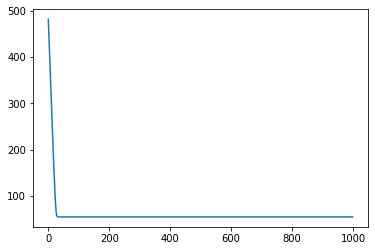

In [403]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [404]:
print(b)

[153.11401959]


# 😶하이퍼 파라미터인 학습률 설정하기

In [405]:
LEARNING_RATE = 18.1228

학습률은 100보다는 아주 약간 작은 수를 아무렇게나 입력하여 정했습니다.

# 😶test 데이터에 대한 성능 확인하기

In [406]:
# test 데이터를 입력시켜 모델의 성능 측정
prediction = model(X_test, W, b)
rmse_t1 = loss(X_test, W, b,y_test)
rmse_t1

51.24602368540571

# 😶Visualization

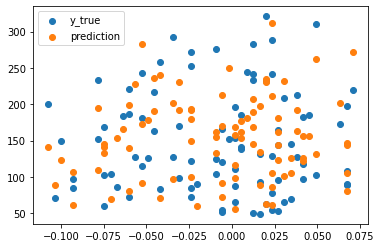

In [407]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.legend(["y_true","prediction"])
plt.show()

In [408]:
#W와 b의 초기값 설정

#Case1.
# W = np.random.rand(10)
# b = np.random.rand(1)
#Case2.
# W = np.random.rand(10)
# b = np.random.rand()

## ※ 위의 주석처리한 두 코드의 차이점은 무엇일까요?

바로 b = np.random.rand()안에 숫자를 집어넣었는지의 여부입니다. 

Case2.의 경우에서 b=np.random.rand()는 float 자료형으로 난수값이 변수에 할당되고 immutable하기 때문에 함수에 호출되었을때 지역변수로 쓰이다 함수의 실행이 끝나면 원래 값을 그대로 유지합니다.

하지만 Case1.의 경우 shape을 출력했을 때 값이 1개 들어있는 1차원 np array를 변수에 할당하기 때문에 mutable 하므로 함수에서 호출되어 변수로 쓰이고, 함수의 실행이 끝났을 때 변한 값이 변수 b에 저장됩니다.

이것 때문에 Training결과는 좋았지만 Test에서 좋지 않은 결과가 나왔고

이를 해결하는 것을 강남4기 '홍성현'님께서 도와주셨고 덕분에 
변수 b의 값이 변하지 않는다는 것을 알아냈으며, 변수 b의 자료형 때문에 변하지 않았다는 원인도 발견할 수 있었습니다.


**교훈**

함수에서 호출된 지역변수가 원래 있던 전역변수이고 immutable변수이면 함수 안에서 값이 변경되어도 함수의 실행이 끝났을 때 원래 전역변수의 값은 변경되지 않음.

만약 mutable변수이면 함수의 실행이 끝났을 때 변경된 값이 전역변수에 저장됨

**함수를 만들 때 변수에 주의해서 만들자.**

## 😶데이터 가져오기

In [409]:
# LMS 사용시 주석처리 해제.
# train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')

In [410]:
# Colab에서 사용시 드라이브에 마운트, 이미 마운트 했으므로 주석처리.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [411]:
train = pd.read_csv('/content/drive/MyDrive/Data/train.csv')

캐글에서 제공한 정보의 요약은 다음과 같습니다.

Data Fields\
datetime - hourly date + timestamp :날짜별 시간과 time stamp.\
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter\
holiday - whether the day is considered a holiday\
workingday - whether the day is neither a weekend nor holiday \
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy\
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist\
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds\
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog\
temp - temperature in Celsius\
atemp - "feels like" temperature in Celsius\
humidity - relative humidity\
windspeed - wind speed\
casual - number of non-registered user rentals initiated\
registered - number of registered user rentals initiated\
count - number of total rentals

-------------------------------------------------------------------------

datetime : 날짜별 시간과 time stamp.\
season -  1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울\
holiday - 공휴일인지 여부(주말은 미포함인듯)\
workingday - 주말이나 공휴일이 아닌지 여부 \
weather - 1: 맑음, 아주 약간 구름낌, 일부 구름\
2: 안개 + 구름, 안개 + Broken clouds? , 안개 + 아주 약간 구름낌, 안개\
3: 가벼운 눈, 가벼운 비 + 천둥번개 + 옅게 퍼진 구름, 가벼운 비 + 옅게 퍼진 구름\
4: 호우 + 싸라기눈 + 천둥번개 + 안개, 눈 + 안개\
temp - 섭씨온도\
atemp - 체감온도\
humidity - 상대습도\
windspeed - 풍속\
casual - 등록하지 않은 렌탈 사용자\
registered - 등록된 렌탈 사용자\
count - 총 렌탈 수.

In [412]:
import pandas as pd
from pandas import DataFrame
import numpy as np
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [413]:
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


## 😶datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [414]:
# train 의 정보를 볼 수 있다.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


https://www.delftstack.com/ko/howto/python-pandas/how-to-extract-month-and-year-separately-from-datetime-column-in-pandas/

링크에서는 열이 Datetime 유형이 아닌 경우, to_datetime() 메서드를 사용해서

열을Datetime 유형으로 변환 한 후에 년,월 등을 추출해야한다 합니다.

In [415]:
#dateTime column을 datetime형식으로 변환.
train['datetime'] = pd.to_datetime(train['datetime'])

In [416]:
# datetime column의 type이 변경된 것을 확인.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


datetime column의 dytpe이 datetime 형식으로 바뀐것을 확인했습니다.

결측치도 없는것을 확인했습니다.

년, 월, 일, 시, 분, 초를 추출하는 코드는

다음 링크를 참고하였습니다.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.year.html

In [417]:
# 년 월 일 시 분 초 column만들어서 datetime column에서 년 정보 추출해서 할당.

# 년 
train['year'] = train['datetime'].dt.year
# 월
train['month'] = train['datetime'].dt.month
# 일
train['day'] = train['datetime'].dt.day
# 시
train['hour'] = train['datetime'].dt.hour
# 분
train['minute'] = train['datetime'].dt.minute
# 초
train['second'] = train['datetime'].dt.second

In [418]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


## 😶year, month, day, hour, minute, second 데이터 개수 시각화하기

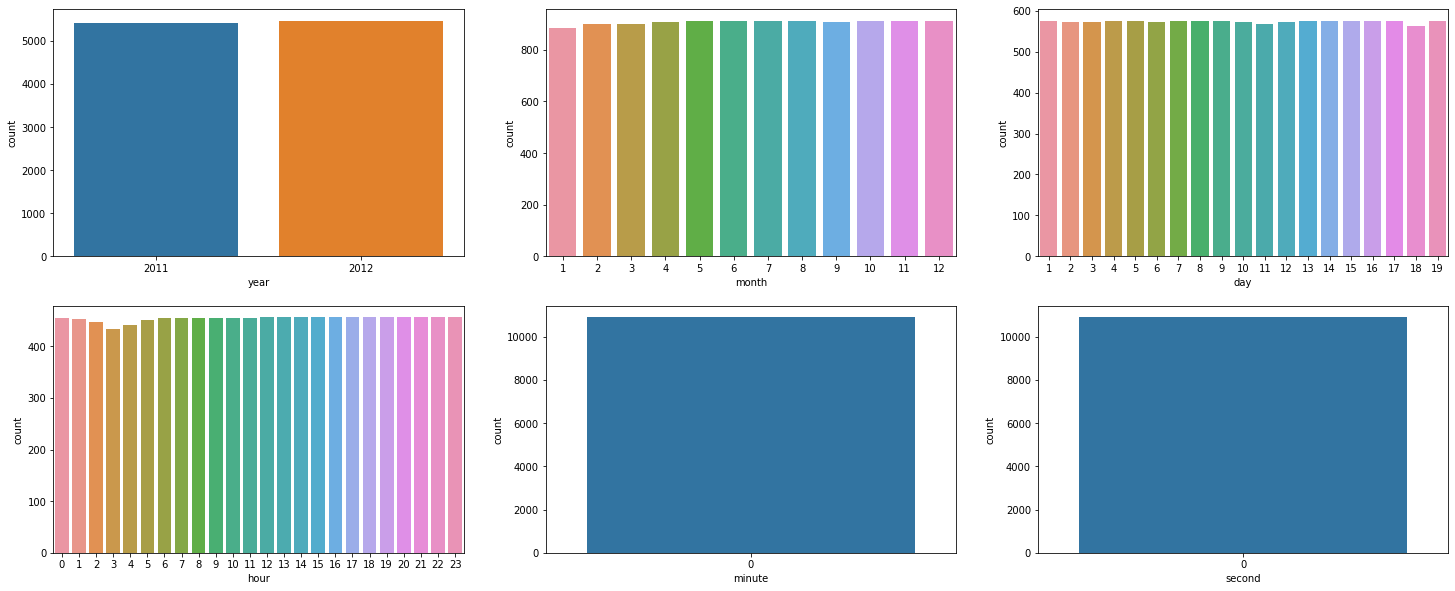

In [419]:
import seaborn as sns
plt.figure(figsize=(25,10))
index_a = ['year', 'month', 'day', 'hour', 'minute', 'second']
#enumerate를 이용하여 인덱스값과 미리 만들어둔 리스트로 for문 사용하여 countplot출력.
for i,a in enumerate(index_a):
    plt.subplot(231+i)
    sns.countplot(x=train[a])
plt.show()

In [420]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.0,10886.0
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,9.992559,11.541613,0.0,0.0
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,5.476608,6.915838,0.0,0.0
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000,0.0,0.0
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,5.000000,6.000000,0.0,0.0
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,10.000000,12.000000,0.0,0.0
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,15.000000,18.000000,0.0,0.0
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,19.000000,23.000000,0.0,0.0


데이터를 살펴보니 우리가 모델에 사용할 데이터에 대해 다음과 같은 결론을 내릴 수 있었습니다.

1. minute 과 Second는 필요 없는 데이터이므로 지우고, datetime column 또한 지워도 무방할 것이다.

2. kaggle의 데이터 요약에서 Count = Registered + Causal 이므로 Casual, Registered column은 지워도 모델에 큰 영향이 없을것이다.

In [421]:
#원하는 column들만 원하는 순서대로 정렬하여 train에 재할당.
train = train[['year','month','day','hour','weather','season', 'holiday','workingday','temp','humidity','atemp','windspeed','count']]
train

,year,month,day,hour,weather,season,holiday,workingday,temp,humidity,atemp,windspeed,count
0,2011,1,1,0,1,1,0,0,9.84,81,14.395,0.0000,16
1,2011,1,1,1,1,1,0,0,9.02,80,13.635,0.0000,40
2,2011,1,1,2,1,1,0,0,9.02,80,13.635,0.0000,32
3,2011,1,1,3,1,1,0,0,9.84,75,14.395,0.0000,13
4,2011,1,1,4,1,1,0,0,9.84,75,14.395,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012,12,19,19,1,4,0,1,15.58,50,19.695,26.0027,336
10882,2012,12,19,20,1,4,0,1,14.76,57,17.425,15.0013,241
10883,2012,12,19,21,1,4,0,1,13.94,61,15.910,15.0013,168
10884,2012,12,19,22,1,4,0,1,13.94,61,17.425,6.0032,129


## 😶 X, y 컬럼 선택 및 train/test 데이터 분리



사실 저 데이터 컬럼들에서 **숫자형 데이터라면, y는 아무거나 정해도 예측할 수 있지 않을까?** 이런 생각이 듭니다.

온도를 예측할 수도 있고, 풍속을 예측할 수도 있고 ,습도도 예측할 수 있지 않을까요?

하지만 우리 프로젝트는 자전거 대여량을 예측하는 것이므로 Count가 y_true가 되겠죠?

하지만 Count를 예측하기 위한 중요한 Feature는 어떤 것인지 알 수 는 없습니다.

그래서 저는 다음과 같은 가설을 세웠습니다.

1. **특별한 상황이 아니라면 연도는 중요한 Feature가 아닐 것이다. Ex) COVID-19**

2. **계절, 월 과 같은 데이터는 온도, 습도, 풍속,상대온도 등의 데이터로 간접적으로 알 수 있을것이다.**

3. **날짜 데이터 대부분은 크게 중요하지 않을것이다.즉, 평균적인 추세를 따라갈 것이다. 날짜보단 휴일, 일하는 날의 여부가 자전거의 렌탈에 더 영향을 미치는 요소일 것이다.**

4. **날씨와 시간대 또한 자전거의 렌탈에 영향을 미치는 요소일 것이다.**

이 가정을 바탕으로 X의 feature를 선정했습니다.

y_label = y_true = $Count$ column

X_feature =  column $[ 'hour', 'holiday','workingday', 'temp', 'humidity','atemp', 'windspeed','weather']$



In [422]:
# DataFrame을 위의 기준에 맞게 column을 분리하여 np array로 변환.
X_df_b = train[['hour','holiday','workingday', 'temp', 'humidity','atemp', 'windspeed','weather']]
y_df_b =  train['count']
X = X_df_b.to_numpy()
y = y_df_b.to_numpy()
print(X.shape,y.shape)

(10886, 8) (10886,)


In [423]:
X_df_b.head()

,hour,holiday,workingday,temp,humidity,atemp,windspeed,weather
0,0,0,0,9.84,81,14.395,0.0,1
1,1,0,0,9.02,80,13.635,0.0,1
2,2,0,0,9.02,80,13.635,0.0,1
3,3,0,0,9.84,75,14.395,0.0,1
4,4,0,0,9.84,75,14.395,0.0,1


X,y shape 모두 row가 일치합니다. 이대로 사용해도 될 것 같습니다.

다음으론 Trainset과 Testset을 분리했습니다.

In [424]:
# 분리한 X와 y를 Train set과 Test set으로 분리.
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=3489)

## 😶LinearRegression 모델 학습

이제는 모델을 학습시켜 예측 결과가 얼마나 좋을 지 예측해보겠습니다.

과연 가설이 맞을까요?

In [425]:
import sklearn
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(X_train,y_train)

LinearRegression()

## 😶학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [426]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error

y_pred = linear_regression.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

rmse =mean_squared_error(y_test, y_pred, squared=False)

print(mse)
print(rmse)

21848.96493204703
147.81395377990208


In [427]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.29704161112604166


데이터의 값을 예측하는 회귀모델의 성능을 RMSE, MSE 말고도 측정할 방법을 찾아보니

분류모델과는 달리 선형 회귀모델은 R2 score를 가지고 모델의 적합성을 측정한다합니다.

R2 Score가 1에 가까울수록 모델의 적합도가 높다는데요.

 지금 학습시킨 모델에 R2 Score를 측정해봤으나 상당히 낮은 점수를 받았습니다.


## 😶 x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

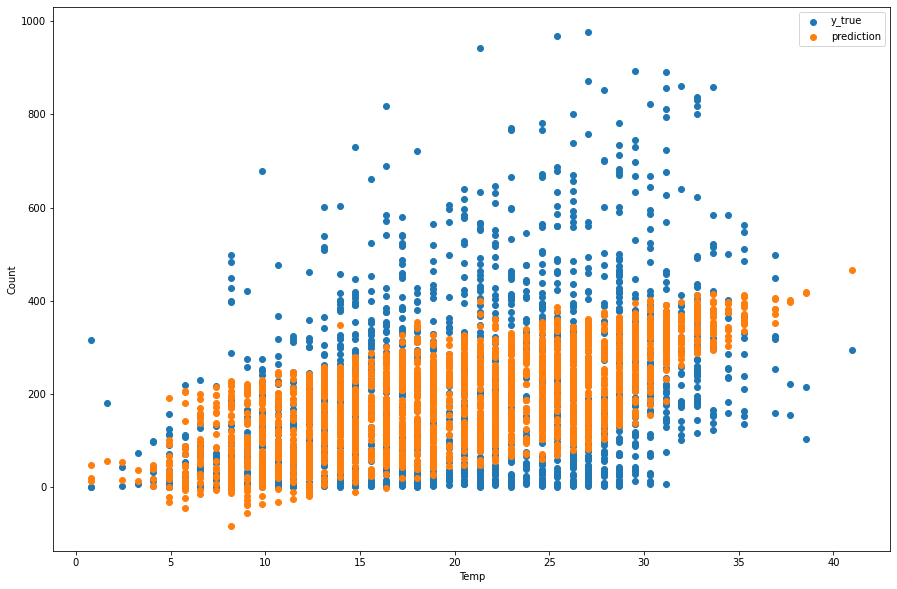

In [428]:
# Temp를 X축으로 했을 때.
plt.figure(figsize=(15,10))

plt.scatter(X_test[:, 3], y_test)
plt.scatter(X_test[:, 3], y_pred)
plt.xlabel('Temp')
plt.ylabel('Count')
plt.legend(["y_true","prediction"])
plt.show()

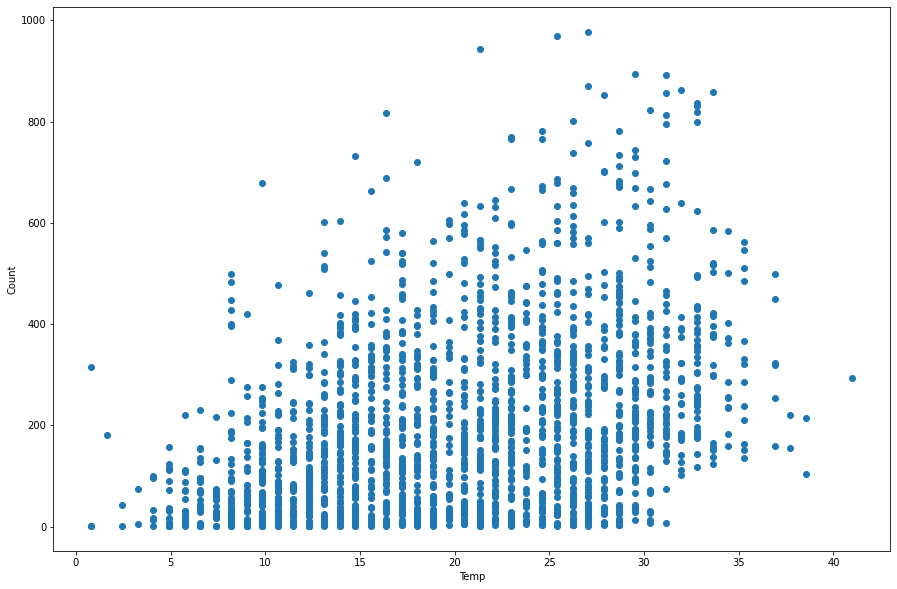

In [429]:
plt.figure(figsize=(15,10))
plt.xlabel('Temp')
plt.ylabel('Count')
plt.scatter(X_test[:, 3], y_test)

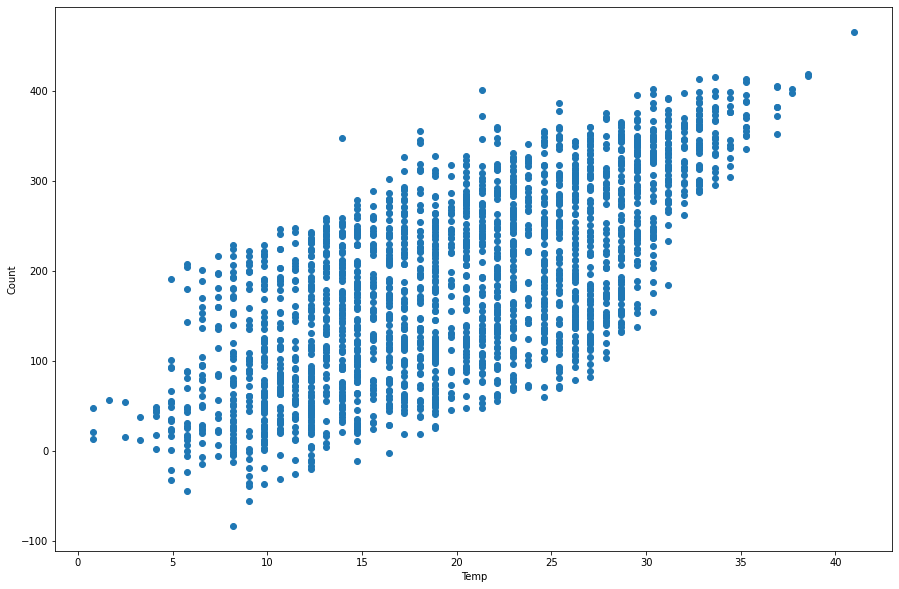

In [430]:
plt.figure(figsize=(15,10))
plt.xlabel('Temp')
plt.ylabel('Count')
plt.scatter(X_test[:, 3], y_pred)

음...위쪽 영역은 잘 못맞추는군요.

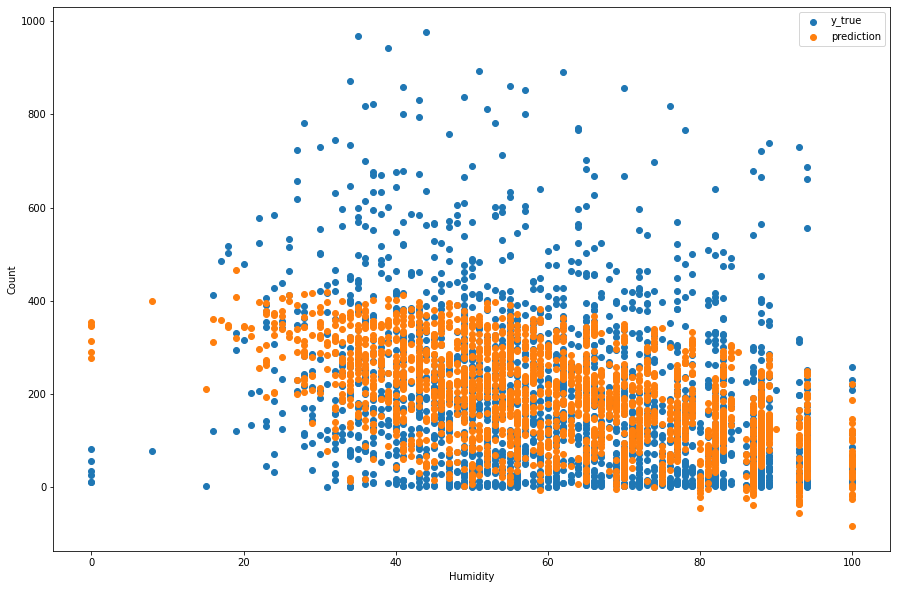

In [431]:
# humidity를 X축으로 했을 때.
plt.figure(figsize=(15,10))

plt.scatter(X_test[:, 4], y_test)
plt.scatter(X_test[:, 4], y_pred)
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.legend(["y_true","prediction"])
plt.show()

Humidity를 기준으로 했을 때도 마찬가지입니다.

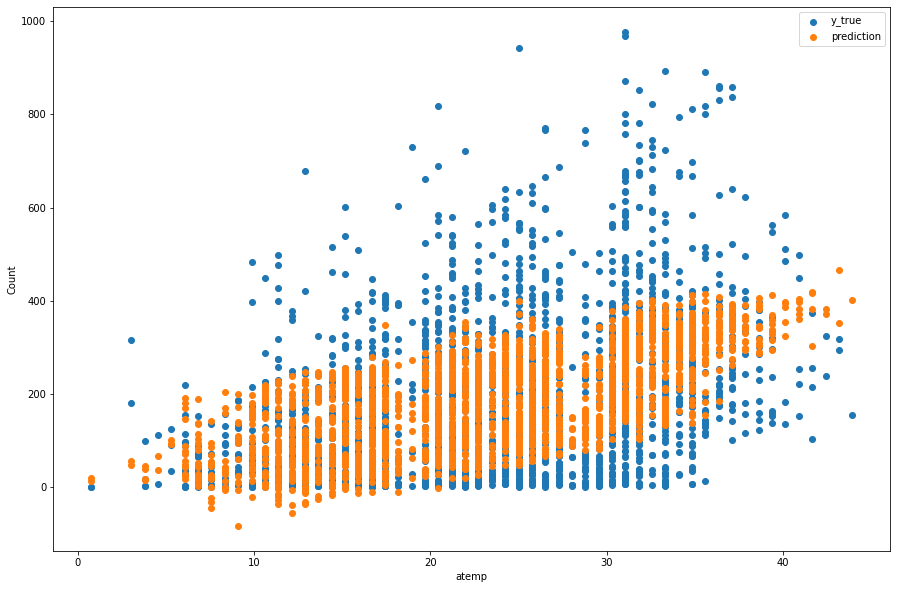

In [432]:
# atemp를 X축으로 했을 때.
plt.figure(figsize=(15,10))

plt.scatter(X_test[:, 5], y_test)
plt.scatter(X_test[:, 5], y_pred)
plt.xlabel('atemp')
plt.ylabel('Count')
plt.legend(["y_true","prediction"])
plt.show()

데이터들을 Visualization한 결과

Count가 매우 클 경우에는 잘 예측하지 못하는것 같습니다.

제가 모르는 다른 Feature들이 Count에 영향을 미쳤기 때문에 제대로 학습시키지 못해 모델의 성능이 제대로 안 나오는 것인지, 

아니면 데이터를 제대로 정규화시키지 못한 탓인지 알기 어렵습니다.

그래서 이번엔 모든 데이터들을 넣어보고 결과를 비교해보려 합니다.

In [436]:
# 모든 feature를 집어넣어 학습시킬 데이터 셋을 생성
X_df_b2 = train[['year','month','day','hour','weather','season', 'holiday','workingday','temp','humidity','atemp','windspeed']]
X2 = X_df_b2.to_numpy()

In [434]:
X_train2, X_test2, y_train, y_test = train_test_split(X2, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=3489)

linear_regression.fit(X_train2,y_train)

y_pred = linear_regression.predict(X_test2)

mse = mean_squared_error(y_test, y_pred)

rmse =mean_squared_error(y_test, y_pred, squared=False)

print(mse)
print(rmse)

19678.89910303069
140.2814995037859


In [435]:
r2 = r2_score(y_test, y_pred)
print(r2)

0.36686029515341523


**완벽하게 제 가설이 반박당한 것 같습니다.** 분명 다른 요소들도 모델의 성능에 영향을 미치고 있음을 확인 할 수 있습니다. 가설을 다시 보면.

1. 특별한 상황이 아니라면 **년도**는 특별한 Feature가 아닐 것이다. Ex) COVID-19

2. **계절, 월** 과 같은 데이터는 온도, 습도, 풍속,상대온도 등의 데이터로 간접적으로 알 수 있을것이다.

3. **날짜 데이터** 대부분은 크게 중요하지 않을것이다.즉, 평균적인 추세를 따라갈 것이다. 날짜보단 휴일, 일하는 날의 여부가 자전거의 렌탈에 더 영향을 미치는 요소일 것이다.

4. 날씨와 시간대 또한 자전거의 렌탈에 영향을 미치는 요소일 것이다.

제가 뺐던건 년,월, 일,계절 데이터였습니다. 뭔지는 모르겠지만 저 feature들이 모델의 성능에 영향을 미친다는 것입니다.

## END

이번 노드를 진행하면서 Project.1은 선형회귀모델을 사용해보기 전 어떤 원리로 모델이 동작하고 학습을 하게되는지, 어떤 방식으로 MSE혹은 RMSE값을 출력하게 되는지를 라이브러리를 사용하지 않고 직접 코드로 구현하는 과정이었습니다.
이 과정에서 편미분을 통해 Grafient를 계산하는 공식을 구했고, 직접 hyper parameter를 설정해서 학습을 시켜 학습률에 따라 모델의 성능이 어떻게 달라지는지도 확인했습니다.
\
\
반면 Project.2의 경우 Project.1에서 얻은 결론을 기반으로 대회에서 쓰이는 데이터를 사용하여 학습시킨 결과가 어떤지를 보는 과정이었습니다. 
\
\
이 과정에서 의미없어 보이는 데이터를 간단한 전처리를 통해 삭제했고, 가설을 세워 예측에 큰 영향이 없을 것이라 생각되는 feature들을 제거하고 학습을 시켰지만 결과는 모든 데이터를 사용했을 때보다 낮은 성능을 보였습니다.

이를 통해 관계없어 보이는 데이터라도 LinearRegression에서 충분한 데이터만 있다면 모델의 성능이 올라간다는 추측을 할 수 있을것 같습니다.
